In [1]:
# Import the Utility Functions
import pandas as pd
import numpy as np
import mls_utils as utils
import matplotlib.pyplot as plt


df = pd.read_csv("Clean_Data/mls_th_cleaned_3.csv")
df.head()

,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Date,Closing Date,List Price,Sold Price,...,Cluster,Price per SqFt,List Year,List Month,Closing Year,Closing Month,Price Increase Percentage,Age of Property,Geo Cluster,Log Sold Price
0,27511,4,4,2.740721,-0.087844,1985,2023-05-08,2023-06-12,2.534087,2.557287,...,2,0.229471,2023,5,2023,6,-0.140416,1.941299,2,1.268998
1,27517,4,5,2.740721,-0.087844,2004,2022-04-25,2022-06-07,2.534087,2.557287,...,1,2.605393,2022,4,2022,6,-0.140416,0.457788,3,1.268998
2,27707,3,5,2.198993,-0.087844,2020,2020-05-22,2021-08-05,2.199023,2.557287,...,1,1.695578,2020,5,2021,8,1.034598,-0.803197,3,1.268998
3,27511,3,4,2.740721,-0.087844,2004,2022-01-24,2022-02-09,2.534087,2.557287,...,2,2.605393,2022,1,2022,2,-0.140416,0.457788,2,1.268998
4,27517,4,5,2.740721,-0.087844,2004,2024-04-06,2024-04-17,2.534087,2.557287,...,1,2.605393,2024,4,2024,4,-0.140416,0.606139,3,1.268998


In [2]:
#Covert the Nan values in Log Sold Price to 0
df['Log Sold Price'] = df['Log Sold Price'].fillna(0)

In [3]:
#Select features and target variables
features = ['Bedrooms', 'Total Baths', 'SqFt', 'Acres', 'Year Built', 'Days on Market', 'Over Asking', 'Lat', 'Price per SqFt', 'List Year', 'Closing Year',
       'Closing Month', 'Price Increase Percentage', 'Geo Cluster'] 
target = 'Sold Price'

In [4]:
# Split the data
X_train, X_test, y_train, y_test = utils.split_data(df, features, target)

# Scale the data
X_train_scaled, X_test_scaled = utils.scale_data(X_train, X_test)

In [5]:
# Feature selection
selected_features = utils.select_features(X_train_scaled, y_train)
X_train_selected = X_train_scaled[:, selected_features]
X_test_selected = X_test_scaled[:, selected_features]

In [6]:
# Ridge Regression
ridge_model = utils.tune_hyperparameters(X_train_selected, y_train, 'ridge')
ridge_train_mse, ridge_test_mse, ridge_train_r2, ridge_test_r2 = utils.evaluate_model(ridge_model, X_train_selected, X_test_selected, y_train, y_test)

print(f'Ridge Regression - Train MSE: {ridge_train_mse}')
print(f'Ridge Regression - Test MSE: {ridge_test_mse}')
print(f'Ridge Regression - Train R2: {ridge_train_r2}')
print(f'Ridge Regression - Test R2: {ridge_test_r2}')

Ridge Regression - Train MSE: 0.034070447913521436
Ridge Regression - Test MSE: 0.03499764410702557
Ridge Regression - Train R2: 0.9657142790109638
Ridge Regression - Test R2: 0.9654982405717305


In [7]:
# Lasso Regression
lasso_model = utils.tune_hyperparameters(X_train_selected, y_train, 'lasso')
lasso_train_mse, lasso_test_mse, lasso_train_r2, lasso_test_r2 = utils.evaluate_model(lasso_model, X_train_selected, X_test_selected, y_train, y_test)

print(f'Lasso Regression - Train MSE: {lasso_train_mse}')
print(f'Lasso Regression - Test MSE: {lasso_test_mse}')
print(f'Lasso Regression - Train R2: {lasso_train_r2}')
print(f'Lasso Regression - Test R2: {lasso_test_r2}')


Lasso Regression - Train MSE: 0.057323164143807705
Lasso Regression - Test MSE: 0.057657193740271
Lasso Regression - Train R2: 0.9423146412095357
Lasso Regression - Test R2: 0.9431597560780779


In [8]:
# Decision Tree Regressor
dt_model = utils.tune_hyperparameters(X_train_selected, y_train, 'decision_tree')
dt_train_mse, dt_test_mse, dt_train_r2, dt_test_r2 = utils.evaluate_model(dt_model, X_train_selected, X_test_selected, y_train, y_test)

print(f'Decision Tree Regressor - Train MSE: {dt_train_mse}')
print(f'Decision Tree Regressor - Test MSE: {dt_test_mse}')
print(f'Decision Tree Regressor - Train R2: {dt_train_r2}')
print(f'Decision Tree Regressor - Test R2: {dt_test_r2}')

Decision Tree Regressor - Train MSE: 0.0017849576523006594
Decision Tree Regressor - Test MSE: 0.0057179325368463835
Decision Tree Regressor - Train R2: 0.9982037641477635
Decision Tree Regressor - Test R2: 0.9943630853491151


In [9]:
# Random Forest Regressor
rf_model = utils.tune_hyperparameters(X_train_selected, y_train, 'random_forest')
rf_train_mse, rf_test_mse, rf_train_r2, rf_test_r2 = utils.evaluate_model(rf_model, X_train_selected, X_test_selected, y_train, y_test)

print(f'Random Forest Regressor - Train MSE: {rf_train_mse}')
print(f'Random Forest Regressor - Test MSE: {rf_test_mse}')
print(f'Random Forest Regressor - Train R2: {rf_train_r2}')
print(f'Random Forest Regressor - Test R2: {rf_test_r2}')

Random Forest Regressor - Train MSE: 0.003038675452554806
Random Forest Regressor - Test MSE: 0.003695154202790602
Random Forest Regressor - Train R2: 0.9969421247702124
Random Forest Regressor - Test R2: 0.9963572027601296


In [10]:
# Support Vector Regressor
svr_model = utils.tune_hyperparameters(X_train_selected, y_train, 'svm')
svr_train_mse, svr_test_mse, svr_train_r2, svr_test_r2 = utils.evaluate_model(svr_model, X_train_selected, X_test_selected, y_train, y_test)

print(f'Support Vector Regressor - Train MSE: {svr_train_mse}')
print(f'Support Vector Regressor - Test MSE: {svr_test_mse}')
print(f'Support Vector Regressor - Train R2: {svr_train_r2}')
print(f'Support Vector Regressor - Test R2: {svr_test_r2}')


Support Vector Regressor - Train MSE: 0.007876120867544262
Support Vector Regressor - Test MSE: 0.007332510251021571
Support Vector Regressor - Train R2: 0.9920741141053981
Support Vector Regressor - Test R2: 0.9927713847277143


In [11]:
# K-Nearest Neighbors Regressor
knn_model = utils.tune_hyperparameters(X_train_selected, y_train, 'knn')
knn_train_mse, knn_test_mse, knn_train_r2, knn_test_r2 = utils.evaluate_model(knn_model, X_train_selected, X_test_selected, y_train, y_test)

print(f'K-Nearest Neighbors Regressor - Train MSE: {knn_train_mse}')
print(f'K-Nearest Neighbors Regressor - Test MSE: {knn_test_mse}')
print(f'K-Nearest Neighbors Regressor - Train R2: {knn_train_r2}')
print(f'K-Nearest Neighbors Regressor - Test R2: {knn_test_r2}')


K-Nearest Neighbors Regressor - Train MSE: 0.004461299470872566
K-Nearest Neighbors Regressor - Test MSE: 0.004147880646362104
K-Nearest Neighbors Regressor - Train R2: 0.9955105119458624
K-Nearest Neighbors Regressor - Test R2: 0.9959108910371132


Bar Charts for Error Metrics

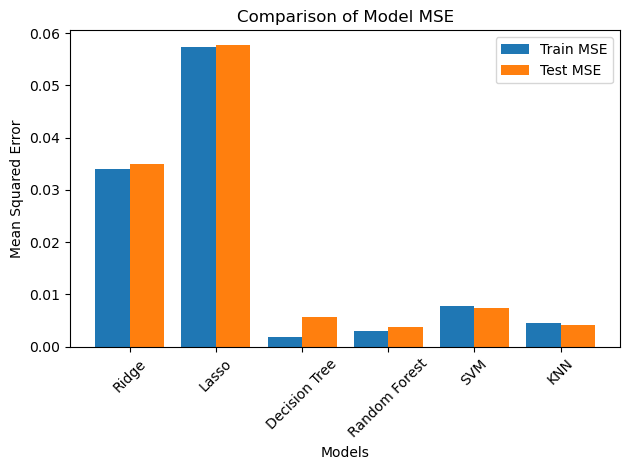

In [18]:
# Data
models = ['Ridge', 'Lasso', 'Decision Tree', 'Random Forest', 'SVM', 'KNN']
train_mse = [ridge_train_mse, lasso_train_mse, dt_train_mse, rf_train_mse, svr_train_mse, knn_train_mse]
test_mse = [ridge_test_mse, lasso_test_mse, dt_test_mse, rf_test_mse, svr_test_mse, knn_test_mse]

x = range(len(models))  # the label locations

fig, ax = plt.subplots()
rects1 = ax.bar(x, train_mse, width=0.4, label='Train MSE')
rects2 = ax.bar([p + 0.4 for p in x], test_mse, width=0.4, label='Test MSE')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Mean Squared Error')
ax.set_title('Comparison of Model MSE')
ax.set_xticks([p + 0.2 for p in x])
ax.set_xticklabels(models, rotation=45)
ax.legend()

fig.tight_layout()

plt.show()

Scatter Plots for Predictions vs. Actuals
